In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.optimize as opt

In [ ]:
from google.colab import files
files.upload()

Saving ChurnData.csv to ChurnData.csv


{'ChurnData.csv': b'tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn\n11.000,33.000,7.000,136.000,5.000,5.000,0.000,1.000,1.000,4.400,20.750,0.000,15.250,35.700,42.000,211.450,125.000,1.000,1.000,0.000,1.000,1.000,0.000,1.482,3.033,4.913,4.000,1.000\n33.000,33.000,12.000,33.000,2.000,0.000,0.000,0.000,0.000,9.450,0.000,0.000,0.000,0.000,288.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.246,3.240,3.497,1.000,1.000\n23.000,30.000,9.000,30.000,1.000,2.000,0.000,0.000,0.000,6.300,0.000,0.000,0.000,0.000,157.050,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.841,3.240,3.401,3.000,0.000\n38.000,35.000,5.000,76.000,2.000,10.000,1.000,1.000,1.000,6.050,45.000,50.100,23.250,64.900,239.550,1873.050,880.000,1.000,1.000,1.000,1.000,1.000,1.000,1.800,3.807,4.331,4.000,0.000\n7.000,35.000,14.000,80.000,2.000,15.000,0.000,1.000,0.000,7.1

In [ ]:
df=pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [ ]:
churn_df=df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
churn_df.head()

<ipython-input-9-2911b8fd4d38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn']=churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
churn_df.shape


(200, 10)

In [ ]:
X=np.asanyarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])
X

array([[11., 33.,  7., ...,  0.,  1.,  1.],
       [33., 33., 12., ...,  0.,  0.,  0.],
       [23., 30.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 6., 32., 10., ...,  0.,  1.,  0.],
       [24., 30.,  0., ...,  0.,  1.,  1.],
       [61., 50., 16., ...,  1.,  1.,  1.]])

In [ ]:
y=np.asanyarray(churn_df['churn'])
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0])

In [ ]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.13518441, -0.62595491, -0.4588971 , ..., -0.85972695,
         0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.85972695,
        -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , ..., -0.85972695,
        -1.54590766, -0.63910148],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -0.85972695,
         0.64686916, -0.63910148],
       [-0.53296457, -0.85594447, -1.14970993, ..., -0.85972695,
         0.64686916,  1.56469673],
       [ 1.18104577,  0.67731925,  0.42929083, ...,  1.16316   ,
         0.64686916,  1.56469673]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

print("train set : ",X_train.shape,y_train.shape)
print("testing set : ",X_test.shape,y_test.shape)

train set :  (160, 9) (160,)
testing set :  (40, 9) (40,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat=lr.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# predict_proba returns estimates for all classes, ordered by the label of classes.
# So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

yhat_prob=lr.predict_proba(X_test)
yhat_prob

array([[0.58711718, 0.41288282],
       [0.56650898, 0.43349102],
       [0.5313329 , 0.4686671 ],
       [0.66722528, 0.33277472],
       [0.53481231, 0.46518769],
       [0.59508358, 0.40491642],
       [0.49995014, 0.50004986],
       [0.56532893, 0.43467107],
       [0.39939231, 0.60060769],
       [0.59368426, 0.40631574],
       [0.54844546, 0.45155454],
       [0.58957413, 0.41042587],
       [0.52439771, 0.47560229],
       [0.41344893, 0.58655107],
       [0.68930146, 0.31069854],
       [0.51576247, 0.48423753],
       [0.4969602 , 0.5030398 ],
       [0.46038301, 0.53961699],
       [0.47010467, 0.52989533],
       [0.57170621, 0.42829379],
       [0.50781873, 0.49218127],
       [0.49802608, 0.50197392],
       [0.66938224, 0.33061776],
       [0.49625351, 0.50374649],
       [0.47635919, 0.52364081],
       [0.73040145, 0.26959855],
       [0.45111513, 0.54888487],
       [0.49187403, 0.50812597],
       [0.4927476 , 0.5072524 ],
       [0.73618723, 0.26381277],
       [0.

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test,yhat,pos_label=0)

0.5625

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 8  7]
 [ 7 18]]


Confusion matrix, without normalization
[[ 8  7]
 [ 7 18]]


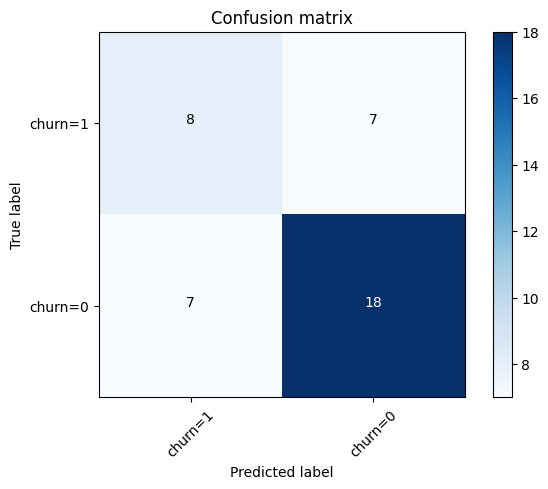

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6155809757244557

In [ ]:
#lets check for different values of c
from sklearn.metrics import accuracy_score
for c_val in [0.001,0.01,0.1,1,10]:
  lr2=LogisticRegression(C=c_val,solver='liblinear').fit(X_train,y_train)
  yhat2=lr2.predict(X_test)
  accuracy=accuracy_score(y_test,yhat2)
  print(f"C : {c_val} and accuracy : {accuracy}")



C : 0.001 and accuracy : 0.625
C : 0.01 and accuracy : 0.65
C : 0.1 and accuracy : 0.575
C : 1 and accuracy : 0.55
C : 10 and accuracy : 0.55


In [ ]:
#now lets check for different solvers

for sol in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
  lr3=LogisticRegression(C=0.01,solver=sol).fit(X_train,y_train)
  yhat3=lr3.predict(X_test)
  accuracy=accuracy_score(y_test,yhat3)
  print(f"solver : {sol} and accuracy : {accuracy}")

solver : newton-cg and accuracy : 0.625
solver : lbfgs and accuracy : 0.625
solver : liblinear and accuracy : 0.65
solver : sag and accuracy : 0.625
solver : saga and accuracy : 0.625


In [ ]:
#now check for different c and solver values combined

for c_val in [0.001,0.01,0.1,1,10]:

  for sol in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:

    lr4=LogisticRegression(C=c_val,solver=sol).fit(X_train,y_train)
    yhat4=lr4.predict(X_test)
    accuracy=accuracy_score(y_test,yhat4)
    print(f"C : {c_val} and solver : {sol} and accuracy : {accuracy}")

C : 0.001 and solver : newton-cg and accuracy : 0.625
C : 0.001 and solver : lbfgs and accuracy : 0.625
C : 0.001 and solver : liblinear and accuracy : 0.625
C : 0.001 and solver : sag and accuracy : 0.625
C : 0.001 and solver : saga and accuracy : 0.625
C : 0.01 and solver : newton-cg and accuracy : 0.625
C : 0.01 and solver : lbfgs and accuracy : 0.625
C : 0.01 and solver : liblinear and accuracy : 0.65
C : 0.01 and solver : sag and accuracy : 0.625
C : 0.01 and solver : saga and accuracy : 0.625
C : 0.1 and solver : newton-cg and accuracy : 0.675
C : 0.1 and solver : lbfgs and accuracy : 0.675
C : 0.1 and solver : liblinear and accuracy : 0.575
C : 0.1 and solver : sag and accuracy : 0.675
C : 0.1 and solver : saga and accuracy : 0.675
C : 1 and solver : newton-cg and accuracy : 0.575
C : 1 and solver : lbfgs and accuracy : 0.575
C : 1 and solver : liblinear and accuracy : 0.55
C : 1 and solver : sag and accuracy : 0.575
C : 1 and solver : saga and accuracy : 0.575
C : 10 and solver